# Q1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
df = pd.read_csv('Cars24.csv', index_col=0)
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


In [ ]:
df.dropna(inplace=True)
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642
...,...,...,...,...,...,...,...,...,...,...
5913,Toyota,Fortuner3.0 AT 4X2,1234899,2012,Chennai,Diesel,197177,Automatic,1,27470
5914,Toyota,Innova2.5 VX 8 STR BS IV,892699,2012,Chennai,Diesel,115553,Manual,2,19858
5915,Maruti,Wagon R 1.0VXI,381399,2014,Chennai,Petrol,24663,Manual,1,8484
5916,Hyundai,i10SPORTZ 1.2 KAPPA2 O,310899,2011,Chennai,Petrol,30159,Manual,1,6916


In [ ]:
len(np.unique(df['Car Brand']))

26

In [ ]:
len(np.unique(df['Model'].astype(str)))

902

In [ ]:
len(np.unique(df['Model Year']))

15

In [ ]:
len(np.unique(df['Location']))

5

In [ ]:
len(np.unique(df['Fuel']))

5

In [ ]:
len(np.unique(df['Gear'].astype(str)))

2

In [ ]:
def getVecForm(vocab, df):
    for i in range(len(vocab)):
        df.replace(vocab[i], i, inplace=True)
    return df

In [ ]:
df['Fuel'] = getVecForm(np.unique(df['Fuel']), df['Fuel'])
df['Car Brand'] = getVecForm(np.unique(df['Car Brand']), df['Car Brand'])
df['Model'] = getVecForm(np.unique(df['Model'].astype(str)), df['Model'])
df['Location'] = getVecForm(np.unique(df['Location']), df['Location'])
df['Gear'] = getVecForm(np.unique(df['Gear'].astype(str)), df['Gear'])
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,7,308,330399,2016,3,2,10674,1,2,7350
1,15,811,350199,2011,3,2,20979,1,1,7790
2,15,31,229199,2011,3,2,47330,1,2,5098
3,15,611,306399,2011,3,2,19662,1,1,6816
4,22,526,208699,2015,3,2,11256,0,1,4642
...,...,...,...,...,...,...,...,...,...,...
5913,23,373,1234899,2012,1,0,197177,0,1,27470
5914,23,453,892699,2012,1,0,115553,1,2,19858
5915,15,813,381399,2014,1,2,24663,1,1,8484
5916,7,884,310899,2011,1,2,30159,1,1,6916


In [ ]:
X = df.drop(['Price'], axis=1).to_numpy()
y = df['Price'].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000).fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.0008841732979664014

In [ ]:
print(mean_squared_error(y_test, y_pred, squared=False))

223357.67037352617


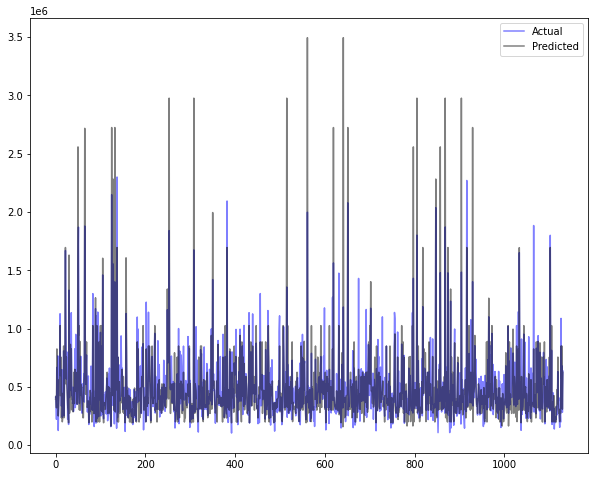

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

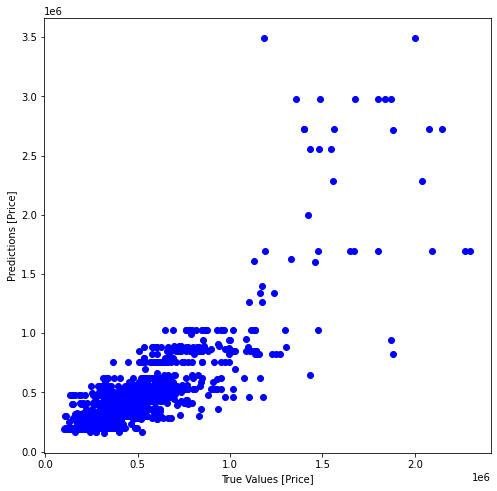

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test-y_pred)

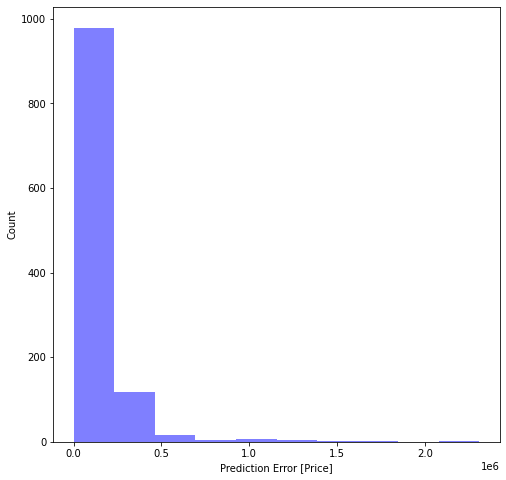

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

# PCA followed by Logistic Regression

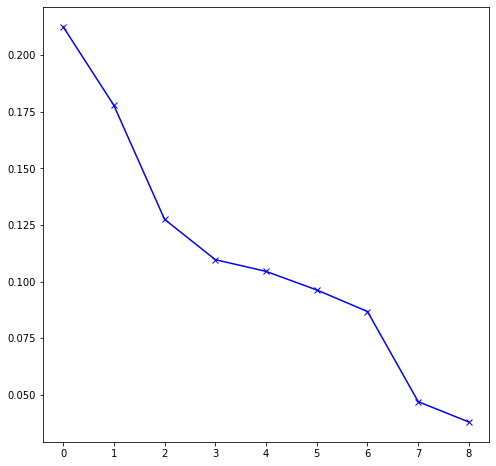

In [ ]:
pca = PCA(n_components=X.shape[1])
pca.fit_transform(X)
ex_var_ratio = pca.explained_variance_ratio_
    
plt.figure(figsize=[8,8])
plt.plot(ex_var_ratio, color='b', linestyle='-', marker='x')
plt.show()

In [ ]:
pca = PCA(n_components=3)
X_new = pca.fit_transform(X)
print(np.sum(pca.explained_variance_ratio_))

0.517746466274219


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.0008841732979664014

In [ ]:
print(mean_squared_error(y_test, y_pred, squared=False))

189427.8861986012


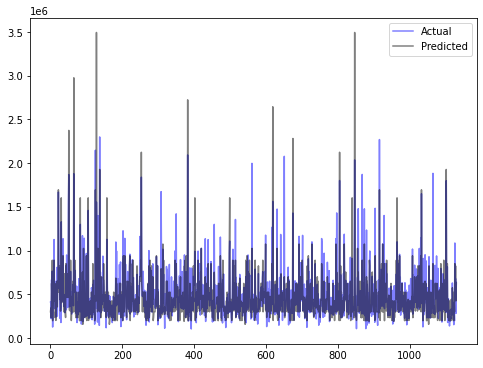

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

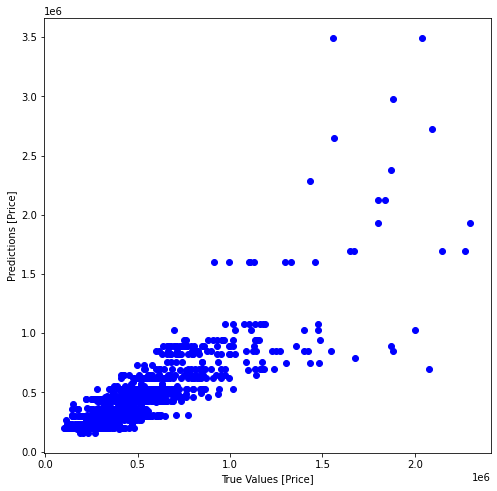

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test-y_pred)

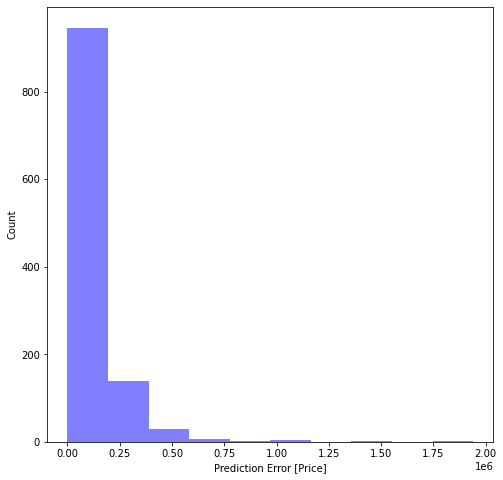

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

# Stochastic Gradient Descent

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_samples, n_features = X_train.shape[0], X_train.shape[1]
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

0.9999999810406437

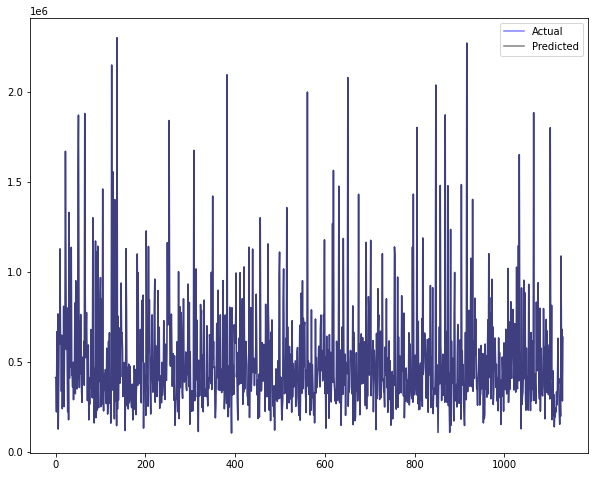

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

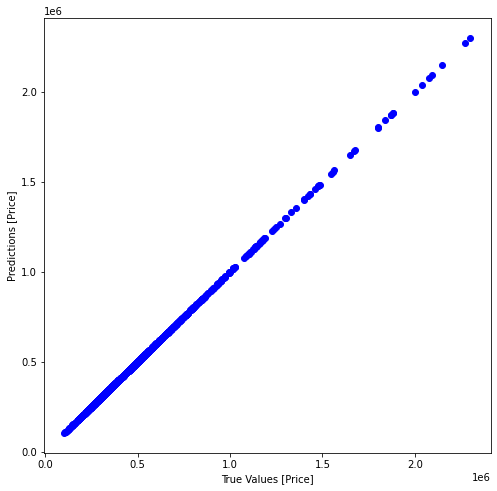

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test-y_pred)

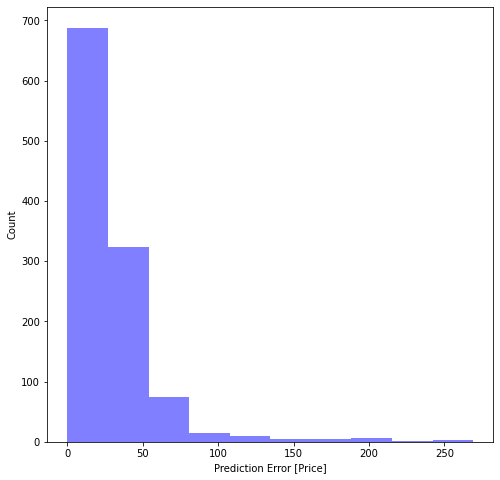

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

# Neural Network

In [ ]:
X_train.shape

(4522, 9)

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam()

    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [ ]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')


model = build_model()

history = model.fit(X_train, 
                    y_train,
                    epochs=1000, validation_split = 0.2, verbose=0,
                    callbacks=[PrintDot()])

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,1.704969e+11,291180.875000,1.704969e+11,1.570612e+10,78195.890625,1.570612e+10,0
1,5.610014e+09,57183.117188,5.610014e+09,7.860103e+09,54204.628906,7.860103e+09,1
2,3.493751e+09,45462.500000,3.493751e+09,5.714004e+09,46957.253906,5.714004e+09,2
3,2.631156e+09,39085.796875,2.631156e+09,4.334066e+09,40310.421875,4.334066e+09,3
4,2.235329e+09,35762.046875,2.235329e+09,3.054960e+09,36603.992188,3.054960e+09,4
...,...,...,...,...,...,...,...
995,7.033458e+07,4866.516113,7.033458e+07,4.213615e+05,422.175079,4.213615e+05,995
996,3.565444e+05,432.848572,3.565444e+05,2.328288e+05,181.723175,2.328288e+05,996
997,4.523653e+04,152.867844,4.523653e+04,1.919872e+05,184.249161,1.919872e+05,997
998,1.505814e+05,282.813843,1.505814e+05,3.960357e+05,414.916443,3.960357e+05,998


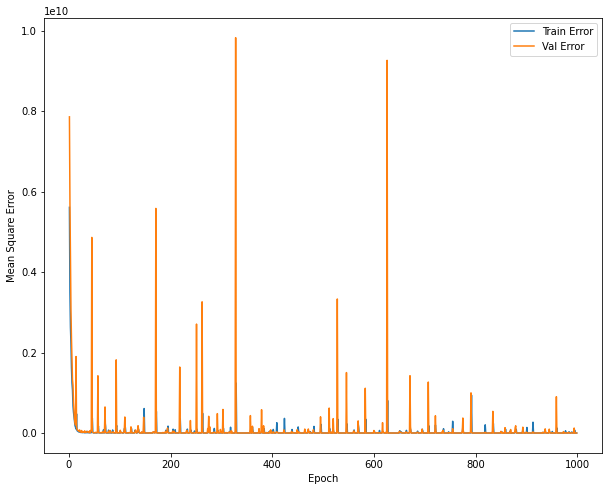

In [ ]:
def plot_history():
    plt.figure(figsize=[10,8])
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist.epoch[1:], hist.loss[1:], label='Train Error')
    plt.plot(hist.epoch[1:], hist.val_loss[1:], label = 'Val Error')
    plt.legend()

plot_history()

In [ ]:
mse, _, _ = model.evaluate(X_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

36/36 [==============================] - 0s 2ms/step - loss: 21999.0273 - mae: 91.2301 - mse: 21999.0273
Root Mean Square Error on test set: 148.321


In [ ]:
y_pred = model.predict(X_test).flatten()

In [ ]:
print(mean_squared_error(y_test, y_pred, squared=False))

148.3204049598047


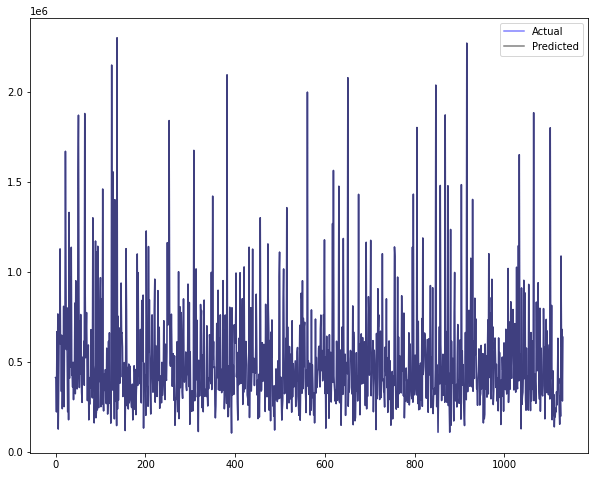

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(y_test, 'b', alpha=0.5, label='Actual')
plt.plot(y_pred, 'k', alpha=0.5, label='Predicted')
plt.legend()
plt.show()

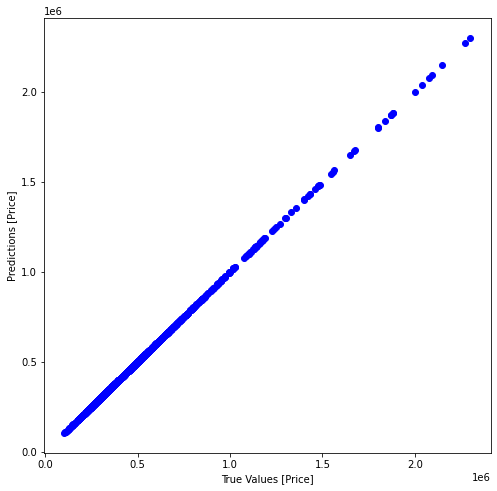

In [ ]:
plt.figure(figsize=[8,8])
plt.scatter(y_test, y_pred, color='b')
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.show()

In [ ]:
error = abs(y_test - y_pred)

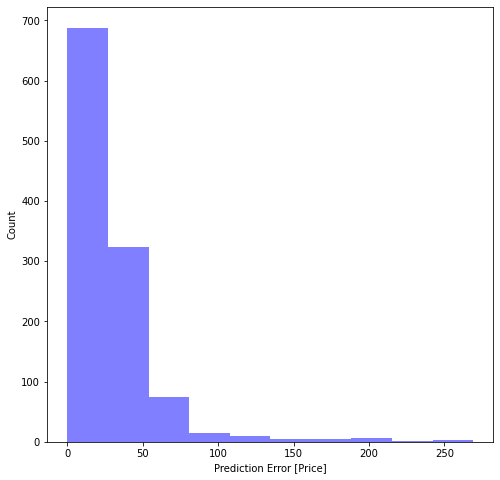

In [ ]:
plt.figure(figsize=[8,8])
plt.hist(error, bins = 10, color='b', alpha=0.5)
plt.xlabel("Prediction Error [Price]")
plt.ylabel("Count")
plt.show()

# Q2

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import svm
import tensorflow as tf
import keras as keras

In [ ]:
training_images = pd.read_csv('fashion-mnist_train.csv')
training_labels = training_images['label']
training_images = training_images[training_images.columns[1:]]
test_images = pd.read_csv('fashion-mnist_test.csv')
test_labels = test_images['label']
test_images = test_images[test_images.columns[1:]]
training_images=StandardScaler().fit_transform(training_images)
test_images=StandardScaler().fit_transform(test_images)

# Neural Network

In [ ]:
# NN architecture with 512 neurons and 10 output nodes.
# Dense layer uses relu activation function and the final layer employs the softmax function. An adam optimizer has been used.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(512, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4751 - accuracy: 0.8391
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3544 - accuracy: 0.8738
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3141 - accuracy: 0.8875
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2961 - accuracy: 0.8949
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2672 - accuracy: 0.9042
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2534 - accuracy: 0.9112
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2329 - accuracy: 0.9164
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2263 - accuracy: 0.9220
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2071 - accuracy: 0.9280
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.196

In [ ]:
model.evaluate(test_images, test_labels)
print(model.metrics_names)

313/313 [==============================] - 1s 2ms/step - loss: 0.4829 - accuracy: 0.8721
['loss', 'accuracy']


# SVM

In [3]:
#Plot confusion matrix
def plot_confusion_matrix(title,y_test,y_pred):

    confusionMatrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(confusionMatrix,annot=True, fmt='.4g')
    plt.ylabel('True',fontsize=15)
    plt.xlabel('Predicted',fontsize=15)
    plt.title(title,fontsize=15)
    plt.show()
    print(classification_report(y_test,y_pred))
    

linear


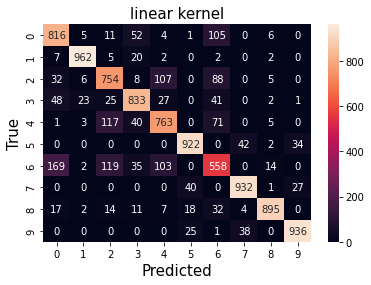

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.75      0.74      1000
           3       0.83      0.83      0.83      1000
           4       0.75      0.76      0.76      1000
           5       0.92      0.92      0.92      1000
           6       0.62      0.56      0.59      1000
           7       0.92      0.93      0.92      1000
           8       0.96      0.90      0.93      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

poly


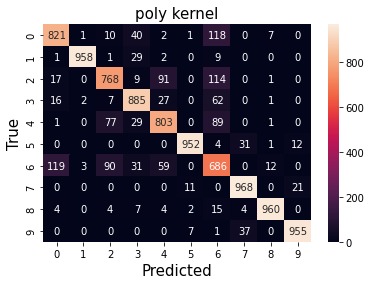

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.77      0.78      1000
           3       0.86      0.89      0.87      1000
           4       0.81      0.80      0.81      1000
           5       0.98      0.95      0.97      1000
           6       0.62      0.69      0.65      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [4]:
# SVM
def svm_func(x_train, x_test, y_train, y_test):
    k = ['linear', 'poly']
    for i in range(len(k)):
        clf = svm.SVC(kernel=k[i])
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        plot_confusion_matrix(k[i]+' kernel', y_test, y_pred)
    
svm_func(training_images, test_images, training_labels, test_labels)

# Logistic regression

In [ ]:

clf = LogisticRegression(max_iter=10000).fit(training_images, training_labels)
accuracy_inbuilt = accuracy_score(test_labels, clf.predict(test_images))

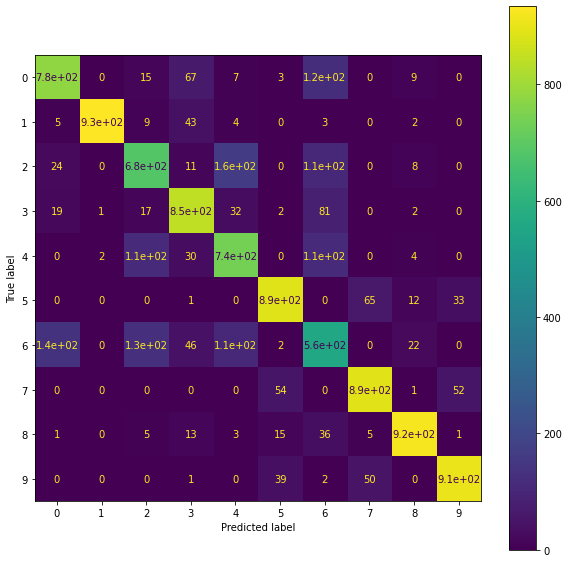

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       1.00      0.93      0.96      1000
           2       0.70      0.68      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.70      0.74      0.72      1000
           5       0.89      0.89      0.89      1000
           6       0.55      0.56      0.55      1000
           7       0.88      0.89      0.89      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.81      0.82     10000



In [ ]:
cm = confusion_matrix(test_labels, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
print(classification_report(test_labels,pred_data))

# LDA

In [ ]:

clf = LinearDiscriminantAnalysis()
clf.fit(training_images, training_labels)
pred_data = clf.predict(test_images)


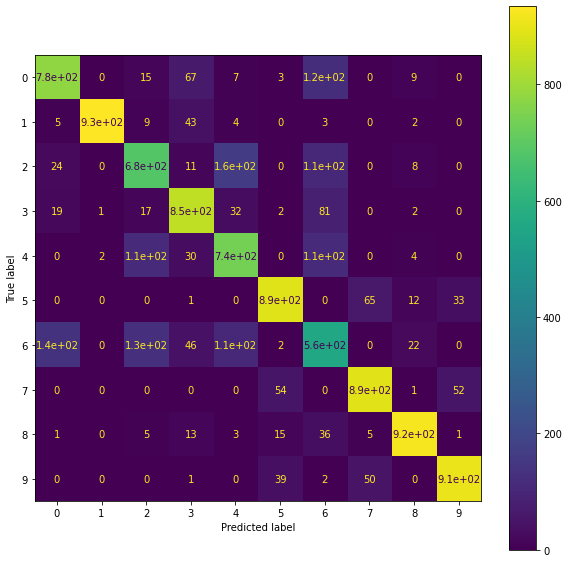

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       1.00      0.93      0.96      1000
           2       0.70      0.68      0.69      1000
           3       0.80      0.85      0.82      1000
           4       0.70      0.74      0.72      1000
           5       0.89      0.89      0.89      1000
           6       0.55      0.56      0.55      1000
           7       0.88      0.89      0.89      1000
           8       0.94      0.92      0.93      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.81      0.82     10000



In [ ]:
cm = confusion_matrix(test_labels, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
print(classification_report(test_labels,pred_data))